## Import Main Libraries

In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import os, cv2, keras
from tqdm import tqdm
import tensorflow as tf
from sklearn.utils import shuffle
from sklearn.metrics import confusion_matrix

## Handling or Adjustment Labels

In [2]:
class_names = ["buildings","forest","glacier","mountain","sea","street"]
class_names_label = {class_name:i for i,class_name in enumerate(class_names)}

IMAGE_SIZE = (150, 150)

class_names_label

{'buildings': 0,
 'forest': 1,
 'glacier': 2,
 'mountain': 3,
 'sea': 4,
 'street': 5}

## Preparing Data

## Data

[ https://www.kaggle.com/datasets/puneet6060/intel-image-classification ](https://www.kaggle.com/datasets/puneet6060/intel-image-classification)





In [3]:
def load_data():
    datasets = [ "/kaggle/input/intel-image-classification/seg_train/seg_train",
                 "/kaggle/input/intel-image-classification/seg_test/seg_test" ]
    output = []
    
    for dataset in datasets:
        
        images = []
        labels = []

        print(f"loading {dataset}")

        # Iterate through each folder
        for folder in os.listdir(dataset):
            
            label = class_names_label[folder]

            # Get folder path
            folder_path = os.path.join(dataset, folder)

            # Iterate through each image
            for img in tqdm(os.listdir(folder_path)):
                
                # Get Image path
                img_path = os.path.join(folder_path, img)

                # Read & Resize Image
                img = cv2.imread(img_path)
                img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
                img = cv2.resize(img, IMAGE_SIZE)

                # Append the images and it's corresponding label to the output
                images.append(img)
                labels.append(label)
        images = np.array(images, dtype = "float32" )
        labels = np.array(labels, dtype = "int32" )

        output.append((images, labels))
    return output

In [4]:
(train_images, train_labels), (test_images, test_labels) = load_data()

loading /kaggle/input/intel-image-classification/seg_train/seg_train


100%|██████████| 2404/2404 [00:19<00:00, 120.82it/s]


loading /kaggle/input/intel-image-classification/seg_test/seg_test


100%|██████████| 553/553 [00:05<00:00, 106.64it/s]


In [5]:
train_images, train_labels = shuffle(train_images, train_labels, random_state = 42)

In [6]:
n_train = train_images.shape[0]
n_test = test_images.shape[0]

print("Number of Training Examples : ", n_train)
print("Number of Test Examples : ", n_test)
print("Each Image Size : ", IMAGE_SIZE)

Number of Training Examples :  14034
Number of Test Examples :  3000
Each Image Size :  (150, 150)


In [7]:
# Normalization
train_images /= 255.0
test_images /= 255.0

## Displaing Samples 

In [8]:
def display_random_image(class_names, images, label):
    idx = np.random.randint(images.shape[0])
    plt.figure()
    plt.imshow( images[idx])
    image_title = f"Image #{idx} " + class_names[label[idx]]
    plt.title(image_title)
    plt.xticks([])
    plt.yticks([])
    plt.grid("false")
    plt.show()

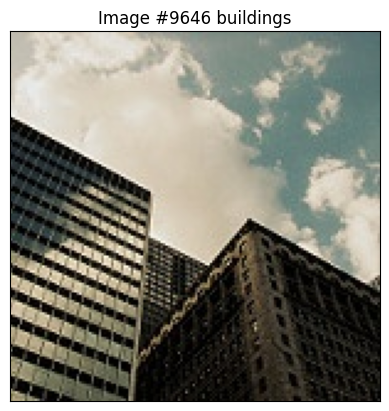

In [9]:
display_random_image(class_names, train_images, train_labels)

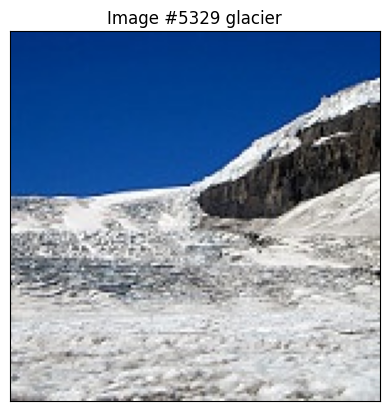

In [10]:
display_random_image(class_names, train_images, train_labels)

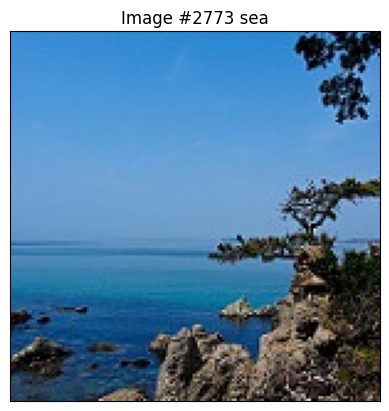

In [11]:
display_random_image(class_names, train_images, train_labels)

In [12]:
def display_examples(class_names, images, label):
    '''
        Display 25 images with it's corresponding labels
    '''
    fig = plt.figure(figsize=(10, 10))
    fig.suptitle("Some Examples Of Images Of The Dataset ", fontsize=18)
    for i in range(25):
        plt.subplot(5, 5, i+1)
        plt.xticks([])
        plt.yticks([])
        plt.grid("false")
        plt.imshow( images[i])
        plt.xlabel(class_names[label[i]])
    plt.show()

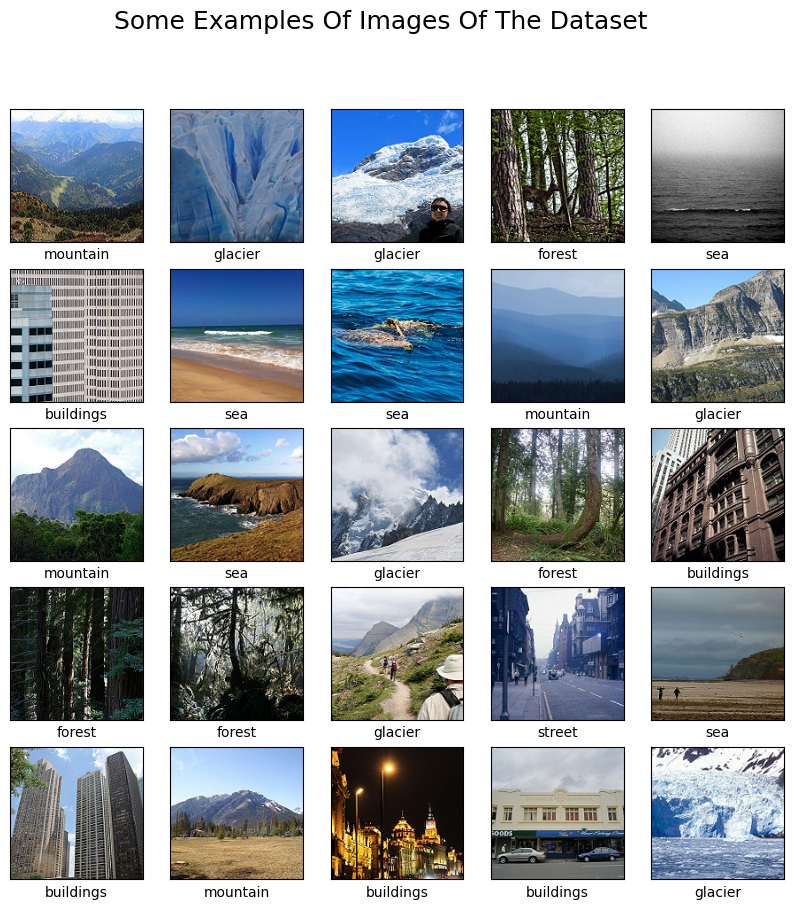

In [13]:
display_examples(class_names, train_images, train_labels)

## Building Model

In [14]:
model_1 = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation="relu", input_shape=(IMAGE_SIZE[0], IMAGE_SIZE[1], 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    
    tf.keras.layers.Conv2D(32, (3, 3), activation="relu"),
    tf.keras.layers.MaxPooling2D(2, 2),
    
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation=tf.nn.relu),
    tf.keras.layers.Dense(6, activation=tf.nn.softmax)])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
I0000 00:00:1752370628.694501      36 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 15513 MB memory:  -> device: 0, name: Tesla P100-PCIE-16GB, pci bus id: 0000:00:04.0, compute capability: 6.0


In [15]:
model_1.compile(optimizer="adam", loss = "sparse_categorical_crossentropy",metrics=["accuracy"])

In [16]:
history_1 = model_1.fit(train_images, train_labels, epochs=20, batch_size = 128, validation_split  = 0.2)

Epoch 1/20


I0000 00:00:1752370639.156744     100 service.cc:148] XLA service 0x79335800af10 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1752370639.157384     100 service.cc:156]   StreamExecutor device (0): Tesla P100-PCIE-16GB, Compute Capability 6.0
I0000 00:00:1752370639.390116     100 cuda_dnn.cc:529] Loaded cuDNN version 90300


 5/88 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - accuracy: 0.1947 - loss: 3.7951

I0000 00:00:1752370642.931848     100 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


88/88 ━━━━━━━━━━━━━━━━━━━━ 15s 108ms/step - accuracy: 0.3961 - loss: 1.9097 - val_accuracy: 0.6733 - val_loss: 0.8634
Epoch 2/20
88/88 ━━━━━━━━━━━━━━━━━━━━ 3s 39ms/step - accuracy: 0.7177 - loss: 0.7652 - val_accuracy: 0.7613 - val_loss: 0.7082
Epoch 3/20
88/88 ━━━━━━━━━━━━━━━━━━━━ 3s 39ms/step - accuracy: 0.7930 - loss: 0.5893 - val_accuracy: 0.7659 - val_loss: 0.6602
Epoch 4/20
88/88 ━━━━━━━━━━━━━━━━━━━━ 3s 39ms/step - accuracy: 0.8422 - loss: 0.4572 - val_accuracy: 0.7731 - val_loss: 0.6668
Epoch 5/20
88/88 ━━━━━━━━━━━━━━━━━━━━ 3s 39ms/step - accuracy: 0.8735 - loss: 0.3723 - val_accuracy: 0.7877 - val_loss: 0.6483
Epoch 6/20
88/88 ━━━━━━━━━━━━━━━━━━━━ 4s 40ms/step - accuracy: 0.9129 - loss: 0.2693 - val_accuracy: 0.7667 - val_loss: 0.7460
Epoch 7/20
88/88 ━━━━━━━━━━━━━━━━━━━━ 3s 39ms/step - accuracy: 0.9261 - loss: 0.2217 - val_accuracy: 0.7770 - val_loss: 0.7822
Epoch 8/20
88/88 ━━━━━━━━━━━━━━━━━━━━ 3s 39ms/step - accuracy: 0.9590 - loss: 0.1452 - val_accuracy: 0.7731 - val_loss: 

In [17]:
model_2 = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation="relu", input_shape=(IMAGE_SIZE[0], IMAGE_SIZE[1], 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Dropout(0.25),
    
    tf.keras.layers.Conv2D(32, (3, 3), activation="relu"),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Dropout(0.25),
    
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation=tf.nn.relu),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(6, activation=tf.nn.softmax)])

In [18]:
model_2.compile(optimizer="adam", loss = "sparse_categorical_crossentropy",metrics=["accuracy"])

In [19]:
history_2 = model_2.fit(train_images, train_labels, epochs=20, batch_size = 128, validation_split  = 0.2)

Epoch 1/20
88/88 ━━━━━━━━━━━━━━━━━━━━ 13s 94ms/step - accuracy: 0.2785 - loss: 2.4220 - val_accuracy: 0.5679 - val_loss: 1.1771
Epoch 2/20
88/88 ━━━━━━━━━━━━━━━━━━━━ 4s 42ms/step - accuracy: 0.5186 - loss: 1.2074 - val_accuracy: 0.6224 - val_loss: 1.0047
Epoch 3/20
88/88 ━━━━━━━━━━━━━━━━━━━━ 4s 42ms/step - accuracy: 0.5637 - loss: 1.1008 - val_accuracy: 0.6416 - val_loss: 1.0082
Epoch 4/20
88/88 ━━━━━━━━━━━━━━━━━━━━ 4s 42ms/step - accuracy: 0.6143 - loss: 1.0097 - val_accuracy: 0.6755 - val_loss: 0.8990
Epoch 5/20
88/88 ━━━━━━━━━━━━━━━━━━━━ 4s 42ms/step - accuracy: 0.6328 - loss: 0.9581 - val_accuracy: 0.7178 - val_loss: 0.8001
Epoch 6/20
88/88 ━━━━━━━━━━━━━━━━━━━━ 4s 42ms/step - accuracy: 0.6747 - loss: 0.8774 - val_accuracy: 0.7239 - val_loss: 0.7760
Epoch 7/20
88/88 ━━━━━━━━━━━━━━━━━━━━ 4s 42ms/step - accuracy: 0.6909 - loss: 0.8303 - val_accuracy: 0.7232 - val_loss: 0.7927
Epoch 8/20
88/88 ━━━━━━━━━━━━━━━━━━━━ 4s 42ms/step - accuracy: 0.7161 - loss: 0.7708 - val_accuracy: 0.7456 - 

## Model Accuracy vs Loss

In [20]:
def plot_accuracy_loss(history):
    """
        Plot the accuracy and the loss during the training of the model.
    """
    fig = plt.figure(figsize=(10,5))
    
    # Plot accuracy
    plt.subplot(221)
    plt.plot(history.history['accuracy'],'bo--', label = "acc")
    plt.plot(history.history['val_accuracy'], 'ro--', label = "val_acc")
    plt.title("train_acc & val_acc")
    plt.ylabel("accuracy")
    plt.xlabel("epochs")
    plt.legend()

    # Plot loss function
    plt.subplot(222)
    plt.plot(history.history['loss'],'bo--', label = "loss")
    plt.plot(history.history['val_loss'], 'ro--', label = "val_loss")
    plt.title("train_loss & val_loss")
    plt.ylabel("loss")
    plt.xlabel("epochs")
    plt.legend()
    
    plt.show()

## Plotting Model Accuarcy vs Loss

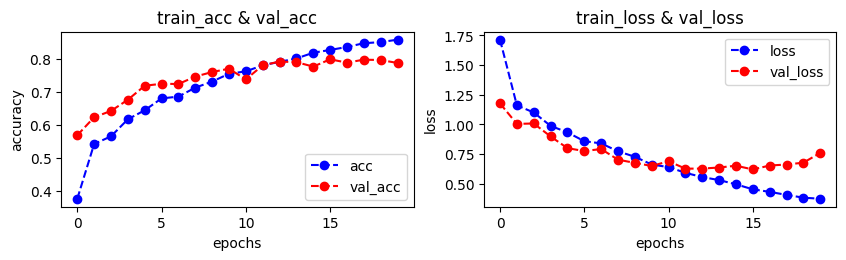

In [21]:
plot_accuracy_loss(history_2)

## Model Evaluation

In [22]:
loss, accuracy = model_2.evaluate(test_images, test_labels)

print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy:.4f}")

94/94 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - accuracy: 0.7570 - loss: 0.8535
Test Loss: 0.7546
Test Accuracy: 0.7867


## Testing Model 

In [23]:
predictions = model_2.predict(test_images)
predictions_labels = np.argmax(predictions, axis=1)

94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step


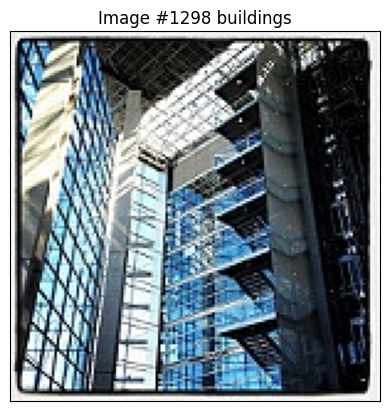

In [28]:
display_random_image(class_names, test_images, predictions_labels)

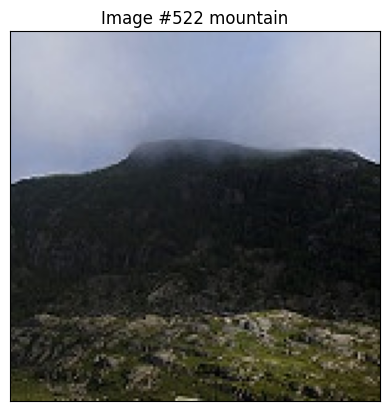

In [34]:
display_random_image(class_names, test_images, predictions_labels)

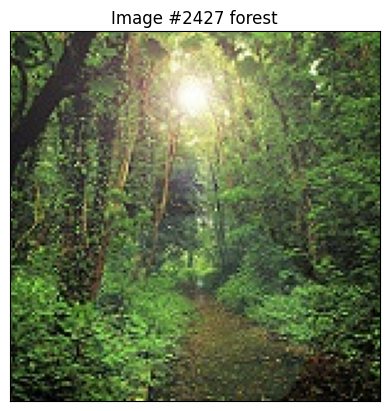

In [26]:
display_random_image(class_names, test_images, predictions_labels)